<a href="https://colab.research.google.com/github/Bahaakhalled/NLP-Text-Similarity/blob/main/Machinfy_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from wordcloud import WordCloud 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
import spacy
nlp = spacy.load('en_core_web_sm')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
!wget 'https://github.com/Bahaakhalled/Bahaakhalled.github.io/blob/main/Text_Similarity_Dataset.csv?raw=true'

--2022-08-16 10:16:03--  https://github.com/Bahaakhalled/Bahaakhalled.github.io/blob/main/Text_Similarity_Dataset.csv?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Bahaakhalled/Bahaakhalled.github.io/raw/main/Text_Similarity_Dataset.csv [following]
--2022-08-16 10:16:03--  https://github.com/Bahaakhalled/Bahaakhalled.github.io/raw/main/Text_Similarity_Dataset.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Bahaakhalled/Bahaakhalled.github.io/main/Text_Similarity_Dataset.csv [following]
--2022-08-16 10:16:03--  https://raw.githubusercontent.com/Bahaakhalled/Bahaakhalled.github.io/main/Text_Similarity_Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...


In [9]:
data=pd.read_csv('Text_Similarity_Dataset.csv?raw=true')
data.head(1)
copydata=data.copy()

In [10]:
data.shape

(4023, 3)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4023 entries, 0 to 4022
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Unique_ID  4023 non-null   int64 
 1   text1      4023 non-null   object
 2   text2      4023 non-null   object
dtypes: int64(1), object(2)
memory usage: 94.4+ KB


In [12]:
temp=data[data.duplicated()]
temp

,Unique_ID,text1,text2


In [13]:
text1=data['text1']
for i in text1:
  temp=i.split()
  #print(max(temp, key=len))

Method above showed how big words are and that it is needed to remove - and / from the strings to seperate the words

Removed all symbols
---



In [14]:
pattern = r'[' + string.punctuation + ']'
copydata['text1']=data['text1'].map(lambda m:re.sub(pattern," ",m))
copydata['text2']=data['text2'].map(lambda m:re.sub(pattern," ",m))

In [15]:
def biggestword(column,method):
  templst=list()
  for i in column:
    temp=i.split()
    templst.append(method(temp, key=len))
  return(method(templst, key=len))

In [16]:
print(biggestword(copydata['text1'],max))
print(biggestword(copydata['text2'],max))
print(biggestword(copydata['text1'],min))
print(biggestword(copydata['text2'],min))

southernplayalisticadillacmuzik
southernplayalisticadillacmuzik
a
2


In [17]:
copydata.head()

,Unique_ID,text1,text2
0,0,savvy searchers fail to spot ads internet sear...,newcastle 2 1 bolton kieron dyer smashed home ...
1,1,millions to miss out on the net by 2025 40 o...,nasdaq planning 100m share sale the owner of ...
2,2,young debut cut short by ginepri fifteen year ...,ruddock backs yapp s credentials wales coach m...
3,3,diageo to buy us wine firm diageo the world s...,mci shares climb on takeover bid shares in us ...
4,4,be careful how you code a new european directi...,media gadgets get moving pocket sized devices ...


Lower Casing

In [18]:
copydata['text1']=copydata['text1'].map(lambda m:m.lower())
copydata['text2']=copydata['text2'].map(lambda m:m.lower())

In [19]:
copydata1=copydata.copy()

Remove Stop Words like the you our etc


In [20]:
#Token Function
def tokenization(text):
    tokens = re.split(' ',text)
    return tokens
#applying function to the column
copydata1['text1']= copydata['text1'].apply(lambda x: tokenization(x))
copydata1['text2']= copydata['text2'].apply(lambda x: tokenization(x))

In [21]:
#Length Function to get Length Difference after each change
def length(item):
  counter=0
  for x in item:
    counter+=len(x)
  return(counter)
before=length(copydata1['text1'])
print('# of Words before removing Stop Words: ' + str(length(copydata1['text1'])))

# of Words before removing Stop Words: 1812132


In [22]:
sw=nltk.corpus.stopwords.words('english')
sw[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [23]:
copytemp1=copydata1['text1'].apply(lambda x: [item for item in x if item not in sw])
copytemp2=copydata1['text2'].apply(lambda x: [item for item in x if item not in sw])

Removing Numbers

In [24]:
copydata1['text1']=copytemp1
copydata1['text2']=copytemp2
copytemp1=copydata1['text1'].apply(lambda x: [item for item in x if not item.isdigit()])
copytemp2=copydata1['text2'].apply(lambda x: [item for item in x if not item.isdigit()])
#removingdigits()

In [25]:
#Checking for Stop Words and numbers
for sent in copytemp1:
  for word in sent:
    if word in sw or word.isdigit():
      print(word)

In [26]:
copydata1['text1']=copytemp1
copydata1['text2']=copytemp2
after=length(copydata1['text1'])
print('# of Words after removing Stop Words: ' + str(length(copydata1['text1'])))

# of Words after removing Stop Words: 1110646


In [27]:
print(str(before-after) + ' Stop words and numbers removed')

701486 Stop words and numbers removed


Apply Lemmatization

In [28]:
lemmatizer = WordNetLemmatizer()

Before Lemmatization

---



---


(random word chosen that requires lemmatization)

In [29]:
copydata1['text1'][0][1]

'searchers'

In [30]:
copydata1['text1']=copydata1['text1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
copydata1['text2']=copydata1['text2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])

After Lemmatization

In [31]:
copydata1['text1'][0][1]

'searcher'

Removed Empty Tokens from lists Below

In [32]:
length(copydata1['text1'])

1110646

In [33]:
copydata1['text1']=copydata1['text1'].apply(lambda x: [item for item in x if item !=''])
copydata1['text2']=copydata1['text2'].apply(lambda x: [item for item in x if item !=''])

In [34]:
length(copydata1['text1'])

884015

Removed Single Letters as they don't make sense

In [35]:
copydata1['text1']=copydata1['text1'].apply(lambda x: [item for item in x if len(item) > 1])
copydata1['text2']=copydata1['text2'].apply(lambda x: [item for item in x if len(item) > 1])

In [36]:
length(copydata1['text1'])

877662

Stacked both text1 and text2 together to create one series to analyse word Repetition and to create a word cloud

In [37]:
temp=copydata1['text1'].apply(pd.Series).stack()
temp1=copydata1['text2'].apply(pd.Series).stack()

In [38]:
temp=pd.concat([temp,temp1])

In [39]:
temp2=temp.str.cat(sep=' ')

In [40]:
word_cloud = WordCloud(width=800, height=400,colormap="Dark2",
        collocations=False,
        ).generate(temp2)

(-0.5, 799.5, 399.5, -0.5)

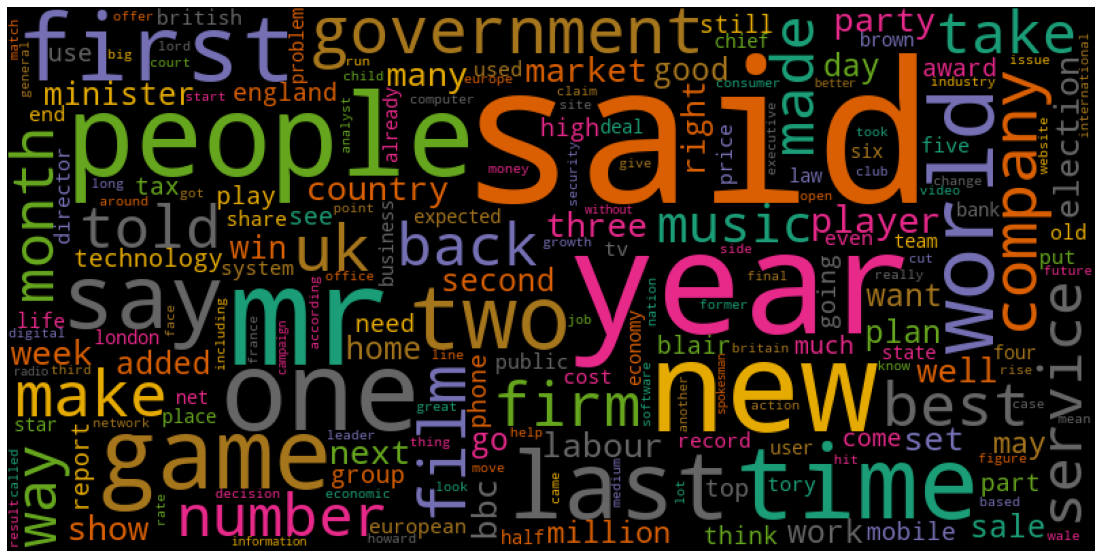

In [41]:
plt.figure( figsize=(20,10) )
plt.imshow(word_cloud)
plt.axis("off")

In [42]:
if 'i' in sw:
  print(True)
else:
  print(False)

True


In [43]:
temp.value_counts()[:20]

said          26113
year          12011
mr            11069
would          9337
also           7807
people         7362
new            7179
one            7073
time           5945
game           5531
could          5466
last           5030
first          4944
two            4647
say            4586
world          4464
government     4332
film           4252
uk             4026
company        3988
dtype: int64

In [44]:
from collections import Counter
counts = Counter(temp)
print(counts.most_common(10))

[('said', 26113), ('year', 12011), ('mr', 11069), ('would', 9337), ('also', 7807), ('people', 7362), ('new', 7179), ('one', 7073), ('time', 5945), ('game', 5531)]


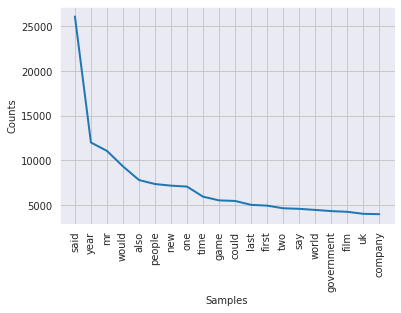

In [45]:
sns.set_style('darkgrid')
nlp_words=nltk.FreqDist(temp)
nlp_words.plot(20);

In [46]:
#text = ' '.join(copydata1['text1'])
#text

In [47]:
copydata1['text1']= copydata1['text1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
copydata1['text2']= copydata1['text2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))

In [48]:
def replacespaces(x,space,second):
  result = x.replace(space, second)
  return result
copydata1['text1']= copydata1['text1'].apply(lambda x: replacespaces(x,'  ',' '))
copydata1['text2']= copydata1['text2'].apply(lambda x: replacespaces(x,'  ',' '))

#copydata1['text1']= copydata['text1'].apply(lambda x: replacespaces(x,' ',''))

In [264]:
bow_converter = CountVectorizer()
def Countvcr():
  similarity=[]
  for i in range(len(copydata1)):
    doc1=copydata1['text1'][i]
    doc2=copydata1['text2'][i]
    docs=(doc1,doc2)
    matrix = CountVectorizer().fit_transform(docs)
    cosine_sim = cosine_similarity(matrix[0], matrix[1])
    similarity.append(cosine_sim)
  return similarity
similarity=Countvcr()

In [265]:
data_cvr=copydata1.copy()
data_cvr['Similarity']=similarity
data_cvr=data_cvr.drop('Unique_ID',axis=1)
data_cvr[:5]

,text1,text2,Similarity
0,savvy searcher fail spot ad internet search en...,newcastle bolton kieron dyer smashed home winn...,[[0.05912507201975728]]
1,million miss net uk population still without i...,nasdaq planning 100m share sale owner technolo...,[[0.06181336224414779]]
2,young debut cut short ginepri fifteen year old...,ruddock back yapp credential wale coach mike r...,[[0.1066335554330038]]
3,diageo buy wine firm diageo world biggest spir...,mci share climb takeover bid share phone compa...,[[0.08999200106650865]]
4,careful code new european directive could put ...,medium gadget get moving pocket sized device l...,[[0.12784641213518705]]


In [266]:
tfidf_vectorizer = TfidfVectorizer()
def SimilarityFn():
  similarity=[]
  for i in range(len(copydata1)):
    doc1=copydata1['text1'][i]
    doc2=copydata1['text2'][i]
    docs=(doc1,doc2)
    tfidf_matrix = tfidf_vectorizer.fit_transform(docs)
    cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
    similarity.append(cosine_sim)
  return similarity
similarity=SimilarityFn()

In [267]:
data_tf=copydata1.copy()
data_tf['Similarity']=similarity

In [268]:
data_tf=data_tf.drop('Unique_ID',axis=1)

In [269]:
data_tf[:5]

,text1,text2,Similarity
0,savvy searcher fail spot ad internet search en...,newcastle bolton kieron dyer smashed home winn...,[[0.03197829363188224]]
1,million miss net uk population still without i...,nasdaq planning 100m share sale owner technolo...,[[0.03266693064041717]]
2,young debut cut short ginepri fifteen year old...,ruddock back yapp credential wale coach mike r...,[[0.057382425433443775]]
3,diageo buy wine firm diageo world biggest spir...,mci share climb takeover bid share phone compa...,[[0.048594384898646766]]
4,careful code new european directive could put ...,medium gadget get moving pocket sized device l...,[[0.07308247572327135]]


In [271]:
All_data=data_cvr.copy()
All_data['Count-Vec Similarity']=All_data['Similarity']
All_data=All_data.drop('Similarity',axis=1)
All_data['Tf-idf Similarity']=data_tf['Similarity']

In [272]:
All_data

,text1,text2,Count-Vec Similarity,Tf-idf Similarity
0,savvy searcher fail spot ad internet search en...,newcastle bolton kieron dyer smashed home winn...,[[0.05912507201975728]],[[0.03197829363188224]]
1,million miss net uk population still without i...,nasdaq planning 100m share sale owner technolo...,[[0.06181336224414779]],[[0.03266693064041717]]
2,young debut cut short ginepri fifteen year old...,ruddock back yapp credential wale coach mike r...,[[0.1066335554330038]],[[0.057382425433443775]]
3,diageo buy wine firm diageo world biggest spir...,mci share climb takeover bid share phone compa...,[[0.08999200106650865]],[[0.048594384898646766]]
4,careful code new european directive could put ...,medium gadget get moving pocket sized device l...,[[0.12784641213518705]],[[0.07308247572327135]]
...,...,...,...,...
4018,labour plan maternity pay rise maternity pay n...,seasonal lift house market swathe figure provi...,[[0.13715374901422514]],[[0.07573441421341853]]
4019,high fuel cost hit airline two largest airline...,new medium battle bafta award bbc lead nominat...,[[0.06175569747293412]],[[0.03266551617825478]]
4020,briton growing digitally obese gadget lover hu...,film star fox behind theatre bid leading actor...,[[0.14597412144408584]],[[0.080999616833927]]
4021,holmes hit hamstring injury kelly holmes force...,tsunami hit sri lanka bank sri lanka bank face...,[[0.05640302949958496]],[[0.029401746033265775]]
